# Project on Disease Prediction using Machine Learning

##### ML algorithms used:-
- Linear regression
- Logistic Regression
- Decision Tree
- K-Means Clustering

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline

data_frame = pd.read_csv("proj-data.csv")
data_frame.shape

(50, 17)

### CORRELATION

In [2]:
def plot_corr(data_frame, size=25):
    """Function plots a graphical correlation matrix for each pair of columns in the dataframe.
    Input:
        data_frame: pandas DataFrame
        size: vertical and horizontal size of the plot
    Displays:
        matrix of correlation between columns.
        Blue-cyan-yellow-red-darkred => less to more correlated
        0 ------------------>  1
        Expect a dark-red line running from top left to bottom right
    """
    corr = data_frame.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

In [3]:
data_frame.corr()

,Age,BMI,Blood_Pressure,Blood_Sugar,Insulin,Glucose,Diabetes_Outcome,Blood_urea_nitrogen_level,Uric_acid,Creatinine_level,Kidney_test_outcome
Age,1.000000,0.005466,0.363865,0.063184,-0.098943,0.343225,0.199776,0.222279,-0.075619,-0.023118,0.132242
BMI,0.005466,1.000000,0.295682,-0.170338,0.221143,0.206208,-0.033682,0.204468,0.054969,0.265964,0.090342
Blood_Pressure,0.363865,0.295682,1.000000,-0.029250,0.085568,0.121625,-0.127110,0.403617,0.021752,0.104475,0.073826
Blood_Sugar,0.063184,-0.170338,-0.029250,1.000000,0.012649,0.139285,0.080412,0.181586,0.248508,0.237710,0.190894
Insulin,-0.098943,0.221143,0.085568,0.012649,1.000000,0.257081,-0.234672,0.052369,-0.098805,0.001285,0.104956
Glucose,0.343225,0.206208,0.121625,0.139285,0.257081,1.000000,0.477320,0.099939,-0.026066,0.151775,0.104187
Diabetes_Outcome,0.199776,-0.033682,-0.127110,0.080412,-0.234672,0.477320,1.000000,-0.053565,-0.074559,0.015724,0.065530
Blood_urea_nitrogen_level,0.222279,0.204468,0.403617,0.181586,0.052369,0.099939,-0.053565,1.000000,0.480021,0.610877,0.689735
Uric_acid,-0.075619,0.054969,0.021752,0.248508,-0.098805,-0.026066,-0.074559,0.480021,1.000000,0.725949,0.698722
Creatinine_level,-0.023118,0.265964,0.104475,0.237710,0.001285,0.151775,0.015724,0.610877,0.725949,1.000000,0.708877


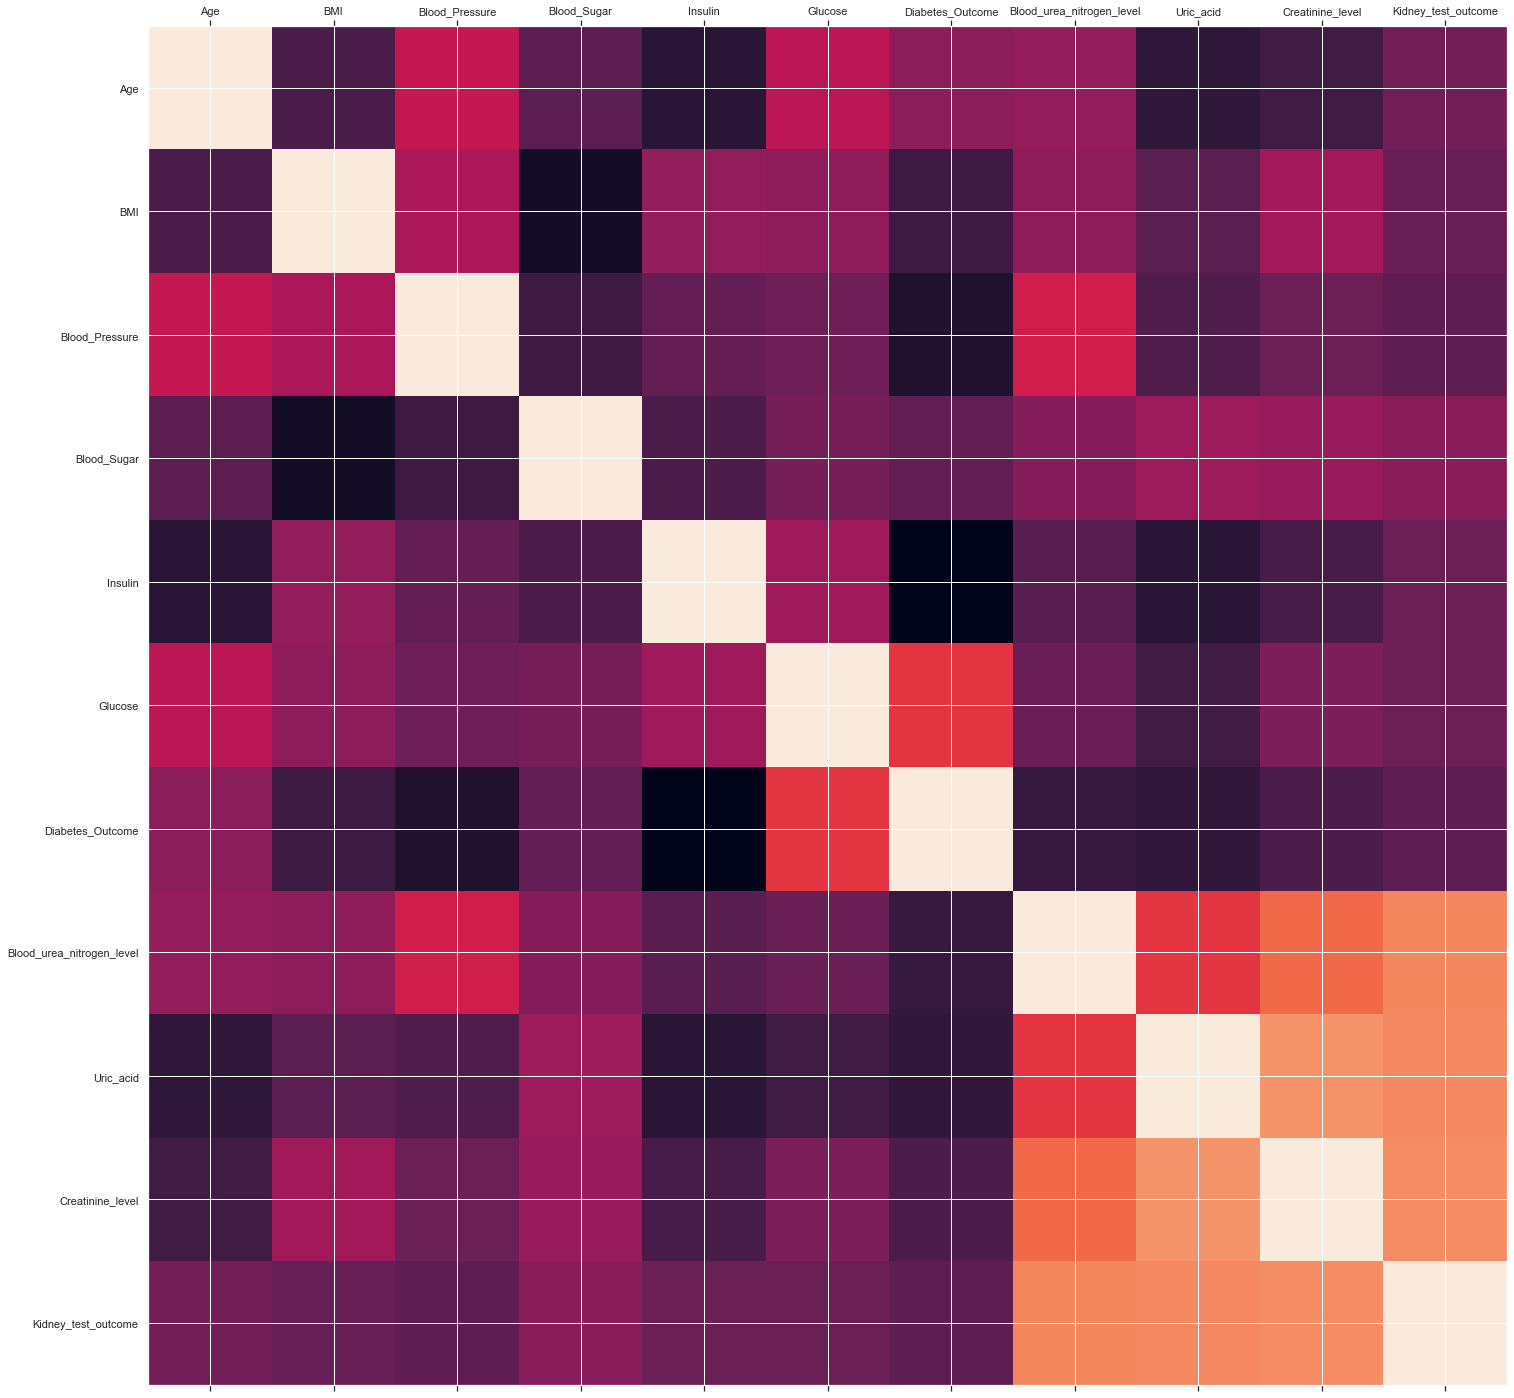

In [4]:
#correlation
plot_corr(data_frame)
plt.savefig('corr.png')

In [5]:
#true cases
num_obs = len(data_frame)
num_true = len(data_frame.loc[data_frame['Diabetes_Outcome'] == 1])
num_false = len(data_frame.loc[data_frame['Diabetes_Outcome'] == 0])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, ((1.00 * num_true)/(1.0 * num_obs)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (( 1.0 * num_false)/(1.0 * num_obs)) * 100))


Number of True cases:  20 (40.00%)
Number of False cases: 30 (60.00%)


### HISTOGRAMS

In [6]:
import pandas as pd
df = pd.read_csv("proj-data.csv")
df.head()

,Serial_ID,Patient_Name,Sex,Blood_group,Age,BMI,Blood_Pressure,Blood_Sugar,Insulin,Glucose,Diabetes_Outcome,Blood_urea_nitrogen_level,Uric_acid,Creatinine_level,Kidney_test_outcome,Drug_Diabetes,Drug_kidney
0,A001,Ananya Mohan,Female,A-,47,33.6,62,80,0,138,1,20,5.5,1.2,0,Precose,Enalapril
1,A002,Dasari K,Male,A-,23,38.2,82,52,125,84,0,20,1.8,1.3,0,Glyset,Enalapril
2,A003,Karan Jadeja,Male,AB+,31,44.2,0,99,0,145,1,7,3.4,0.9,0,Precose,Enalapril
3,A004,Himanshu Soni,Male,A+,24,42.3,68,110,250,135,0,15,4.5,0.4,0,Precose,Ramipril
4,A005,Moti Lal,Male,O+,21,40.7,62,155,480,139,0,25,6.7,1.5,1,Precose,Captopril


In [7]:
msm= df[['Age','BMI','Blood_Pressure','Insulin','Glucose','Blood_urea_nitrogen_level','Uric_acid','Creatinine_level']]
msm.describe()#it presents the mean,standard deviation,min value,max value of the dataset of patient parameters

,Age,BMI,Blood_Pressure,Insulin,Glucose,Blood_urea_nitrogen_level,Uric_acid,Creatinine_level
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000
mean,36.30000,32.064000,68.940000,66.360000,122.800000,23.180000,5.232000,1.34600
std,13.21139,8.178787,17.779155,101.080845,36.027767,8.160857,2.179257,0.73435
min,21.00000,0.000000,0.000000,0.000000,71.000000,5.000000,1.700000,0.00000
25%,25.00000,26.775000,64.000000,0.000000,91.750000,16.500000,3.250000,0.90000
50%,33.00000,32.200000,70.000000,0.000000,114.000000,24.000000,5.650000,1.30000
75%,45.00000,37.275000,77.500000,101.250000,145.750000,29.750000,6.700000,1.57500
max,67.00000,49.100000,110.000000,480.000000,195.000000,38.000000,8.900000,3.60000


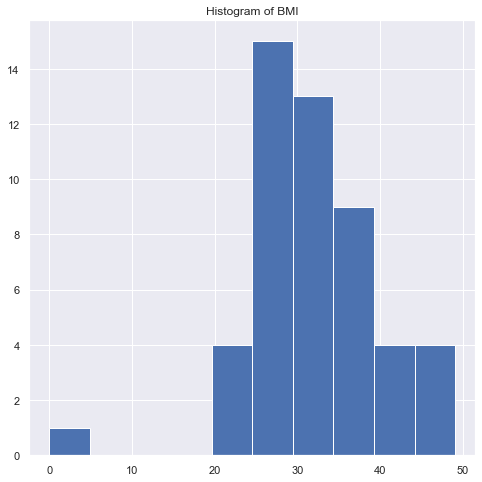

<Figure size 432x288 with 0 Axes>

In [8]:
#BMI
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

BMI= df[['BMI',]]
BMI.hist(figsize=(8,8))
plt.title("Histogram of BMI")
plt.show()
plt.savefig('histoBMI.jpg')

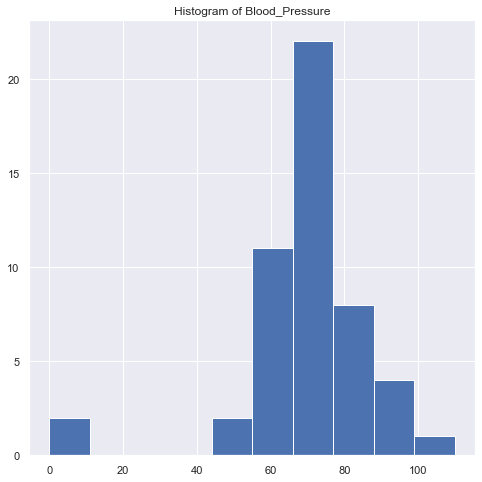

<Figure size 432x288 with 0 Axes>

In [9]:
#blood pressure
bp= df[['Blood_Pressure']]
bp.hist(figsize=(8,8))
plt.title("Histogram of Blood_Pressure")
plt.show()
plt.savefig('HistoBP.png')

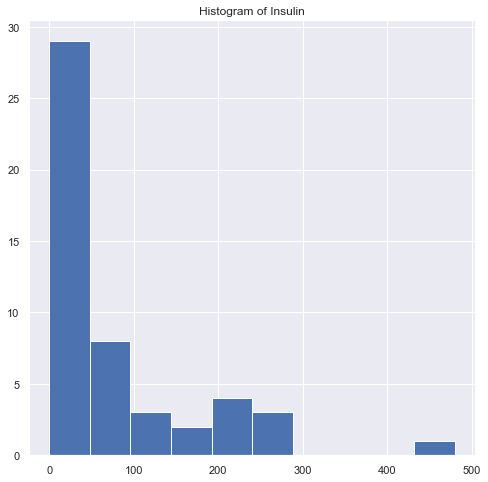

<Figure size 432x288 with 0 Axes>

In [10]:
#Insulin
I= df[['Insulin']]
I.hist(figsize=(8,8))
plt.title("Histogram of Insulin")
plt.show()
plt.savefig('HistoInsulin.png')

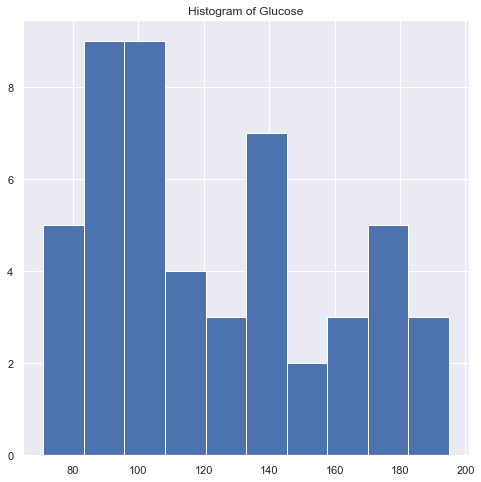

<Figure size 432x288 with 0 Axes>

In [11]:
#Glucose
G= df[['Glucose']]
G.hist(figsize=(8,8))
plt.title("Histogram of Glucose")
plt.show()
plt.savefig('HistoGlucose.png')

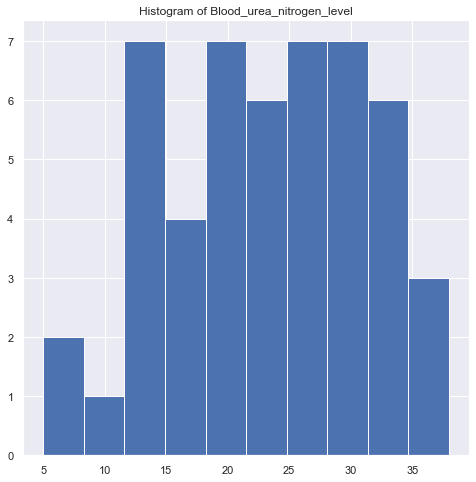

<Figure size 432x288 with 0 Axes>

In [12]:
#Blood Urea Nitrogen Level
bun= df[['Blood_urea_nitrogen_level']]
bun.hist(figsize=(8,8))
plt.title("Histogram of Blood_urea_nitrogen_level")
plt.show()
plt.savefig('HistoBloodUreaNitroLv.png')

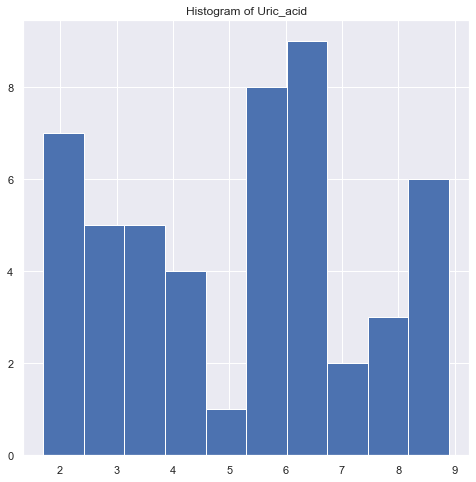

<Figure size 432x288 with 0 Axes>

In [13]:
#Uric acid
ua= df[['Uric_acid']]
ua.hist(figsize=(8,8))
plt.title("Histogram of Uric_acid")
plt.show()
plt.savefig('HistoUricAcid.png')

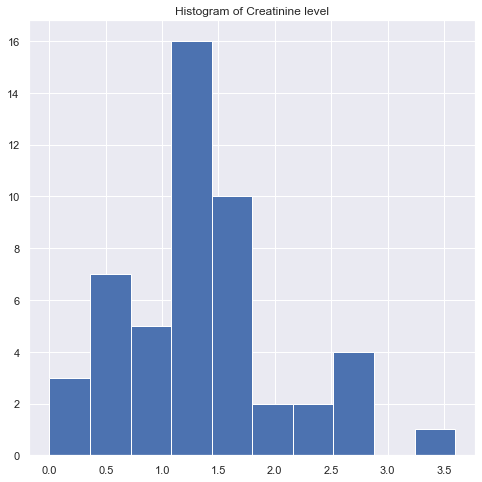

<Figure size 432x288 with 0 Axes>

In [14]:
#Creatinine level
c= df[['Creatinine_level']]
c.hist(figsize=(8,8))
plt.title("Histogram of Creatinine level")
plt.show()
plt.savefig('HistoCreatinineLv.png')

### BAR GRAPH

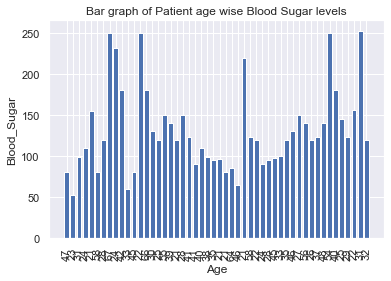

<Figure size 432x288 with 0 Axes>

In [15]:
table=pd.read_csv('proj-data.csv')
table.head()

plt.bar(x=np.arange(1,51),height=table['Blood_Sugar'])

plt.title("Bar graph of Patient age wise Blood Sugar levels")

"""
Give the x axis some labels across the tick marks.
Argument one is the position for each label
Argument two is the label values and the final one is to rotate our labels
"""
plt.xticks(np.arange(1,51), table['Age'], rotation=90)

plt.xlabel("Age")
plt.ylabel("Blood_Sugar")

plt.show()
plt.savefig('BarBloodSugar-age.png')

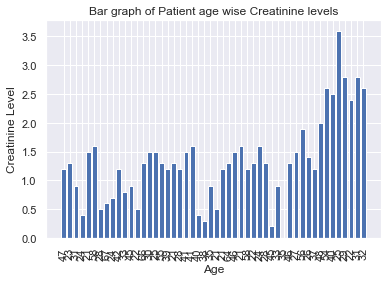

<Figure size 432x288 with 0 Axes>

In [16]:
table=pd.read_csv('proj-data.csv')
table.head()

plt.bar(x=np.arange(1,51),height=table['Creatinine_level'])
plt.title("Bar graph of Patient age wise Creatinine levels")
"""
Give the x axis some labels across the tick marks.
Argument one is the position for each label
Argument two is the label values and the final one is to rotate our labels
"""
plt.xticks(np.arange(1,51), table['Age'], rotation=90)

plt.xlabel("Age")
plt.ylabel("Creatinine Level")

plt.show()
plt.savefig('BarCreatinineLv-age.png')

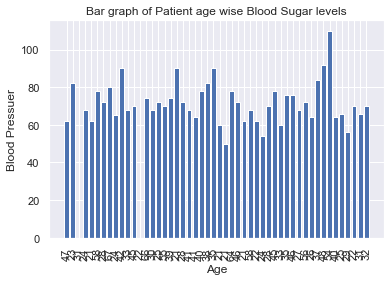

<Figure size 432x288 with 0 Axes>

In [17]:
table=pd.read_csv('proj-data.csv')
table.head()

plt.bar(x=np.arange(1,51),height=table['Blood_Pressure'])
plt.title("Bar graph of Patient age wise Blood Sugar levels")
"""
Give the x axis some labels across the tick marks.
Argument one is the position for each label
Argument two is the label values and the final one is to rotate our labels
"""
plt.xticks(np.arange(1,51), table['Age'], rotation=90)

plt.xlabel("Age")
plt.ylabel("Blood Pressuer")

plt.show()
plt.savefig('BarBP-age.png')

### LINEAR REGRESSION

FOR DIABETES

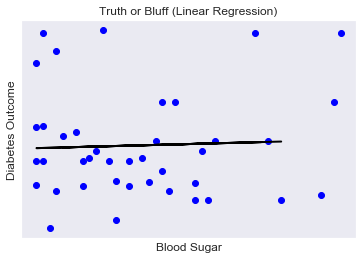

<Figure size 432x288 with 0 Axes>

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('proj-data.csv')
X = dataset.iloc[:, [4]].values
y = dataset.iloc[:, 7].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(X,y,test_size=0.2)

from sklearn.linear_model import LinearRegression

regr = LinearRegression()

regr.fit(x_train, y_train)

y_pred = regr.predict(x_test)

plt.scatter(x_train, y_train, color = 'blue')
plt.plot(x_test, y_pred, color = 'black', linewidth = 2)
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Blood Sugar')
plt.ylabel('Diabetes Outcome')
plt.xticks(())
plt.yticks(())
plt.show()
plt.savefig('linear-regr-BloodSugar-DiabetOut.png')

In [19]:
import math
from sklearn.metrics import mean_squared_error

rmse = math.sqrt(mean_squared_error(x_test, y_pred))
print(rmse)
"""
Around 0.001 is great, 1.0 - 2.0 means you should tune your model
greater than that means if tuning doesn't work, try another model
"""

100.79302935013986


"\nAround 0.001 is great, 1.0 - 2.0 means you should tune your model\ngreater than that means if tuning doesn't work, try another model\n"

### LOGISTIC REGRESSION

FOR DIABETES

In [20]:
from sklearn.model_selection import train_test_split

feature_col_names = ['Blood_Sugar', 'Insulin', 'Glucose']
predicted_class_names = ['Diabetes_Outcome']

X = data_frame[feature_col_names].values
y = data_frame[predicted_class_names].values
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

c:\users\allan\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


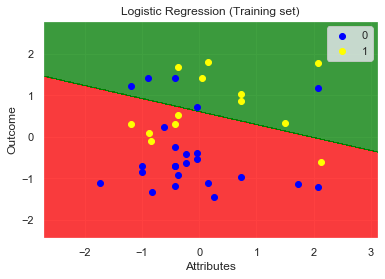

<Figure size 432x288 with 0 Axes>

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('proj-data.csv')
X = dataset.iloc[:, [7, 9]].values
y = dataset.iloc[:, 10].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'yellow'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Attributes')
plt.ylabel('Outcome')
plt.legend()
plt.show()
plt.savefig('LogisticDiabetesTraining-Attribute-Outcome.png')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


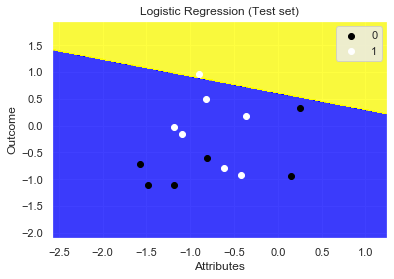

<Figure size 432x288 with 0 Axes>

In [22]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'yellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c = ListedColormap(('black', 'white'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Attributes')
plt.ylabel('Outcome')
plt.legend()
plt.show()
plt.savefig('LogisticDiabetesTesting-Attribute-outcome.png')

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5384615384615384

FOR KIDNEY

c:\users\allan\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


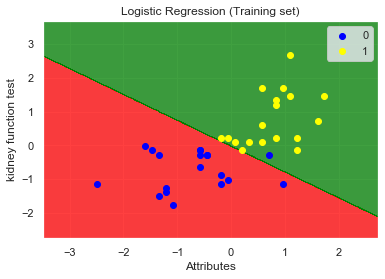

<Figure size 432x288 with 0 Axes>

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('proj-data.csv')
X = dataset.iloc[:, [11, 13]].values
y = dataset.iloc[:, 14].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('blue', 'yellow'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Attributes')
plt.ylabel('kidney function test')
plt.legend()
plt.show()
plt.savefig('LogisticKidneyTraining-Attribute-KidneyFuncTest.png')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


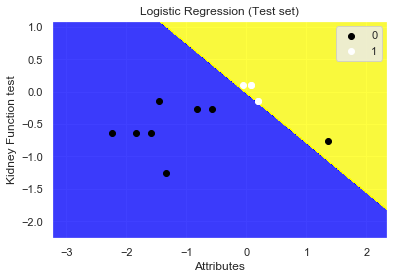

<Figure size 432x288 with 0 Axes>

In [25]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'yellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('black', 'white'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Attributes')
plt.ylabel('Kidney Function test')
plt.legend()
plt.show()
plt.savefig('LogisticKidneyTest-Attribute-KidneyFuncTest.png')

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9230769230769231

### DECISION TREE

FOR DIABETES

In [27]:
feature_col_names = [ 'Blood_Sugar', 'Insulin', 'Glucose']
predicted_class_names = ['Diabetes_Outcome']
X = data_frame[feature_col_names].values     # predictor feature columns (8 X m)
y = data_frame[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X m)
split_test_size = 0.30
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=3)
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion="entropy", max_depth =4)
clf.fit(X,y)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [28]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X,y)
y_pred=clf.predict(X_testset)

from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, y_pred))
dot_data=StringIO()
tree.export_graphviz(clf,out_file=dot_data,feature_names=feature_col_names)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('DecisionTreeDIABETES.png')
Image=(graph.create_png())

c:\users\allan\appdata\local\programs\python\python36\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


DecisionTrees's Accuracy:  1.0


FOR KIDNEY

In [29]:
from sklearn.model_selection import train_test_split

feature_col_names = [ 'Blood_urea_nitrogen_level', 'Uric_acid', 'Creatinine_level']
predicted_class_names = ['Kidney_test_outcome']

X = data_frame[feature_col_names].values
y = data_frame[predicted_class_names].values
split_test_size = 0.30
from sklearn.model_selection import train_test_split

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=3)

from sklearn.tree import DecisionTreeClassifier

clf=DecisionTreeClassifier(criterion="entropy", max_depth =4)
clf.fit(X,y)

from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn import tree
import pydotplus

from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X,y)
y_pred=clf.predict(X_testset)

from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, y_pred))

dot_data=StringIO()
tree.export_graphviz(clf,out_file=dot_data,feature_names=feature_col_names)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('DecisionTreeKIDNEY.png')
Image=(graph.create_png())

DecisionTrees's Accuracy:  1.0


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
%matplotlib inline

df = pd.read_csv("proj-data.csv")
df.head()

,Serial_ID,Patient_Name,Sex,Blood_group,Age,BMI,Blood_Pressure,Blood_Sugar,Insulin,Glucose,Diabetes_Outcome,Blood_urea_nitrogen_level,Uric_acid,Creatinine_level,Kidney_test_outcome,Drug_Diabetes,Drug_kidney
0,A001,Ananya Mohan,Female,A-,47,33.6,62,80,0,138,1,20,5.5,1.2,0,Precose,Enalapril
1,A002,Dasari K,Male,A-,23,38.2,82,52,125,84,0,20,1.8,1.3,0,Glyset,Enalapril
2,A003,Karan Jadeja,Male,AB+,31,44.2,0,99,0,145,1,7,3.4,0.9,0,Precose,Enalapril
3,A004,Himanshu Soni,Male,A+,24,42.3,68,110,250,135,0,15,4.5,0.4,0,Precose,Ramipril
4,A005,Moti Lal,Male,O+,21,40.7,62,155,480,139,0,25,6.7,1.5,1,Precose,Captopril


In [31]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

X =df[['Age', 'Sex','Diabetes_Outcome']].values
d={'Male':1,'Female':0}
df['Sex']=df['Sex'].map(d)
X =df[['Age', 'Sex', 'Glucose','Diabetes_Outcome']].values
y = df["Drug_Diabetes"]

from sklearn.model_selection import train_test_split

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=3)
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth =4)
drugTree # it shows the default parameters
drugTree.fit(X_trainset,y_trainset)
predTree = drugTree.predict(X_testset)
print (predTree [0:50])
print (y_testset [0:50])

from sklearn import metrics
import matplotlib.pyplot as plt

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

['Actoplus' 'Glyset' 'Glyset' 'Actoplus' 'Glyset' 'Glyset' 'Precose'
 'Precose' 'Precose' 'Glyset']
12    Actoplus
39      Glyset
9       Glyset
47    Actoplus
31      Glyset
28      Glyset
13     Precose
48      Glyset
45     Precose
6       Glyset
Name: Drug_Diabetes, dtype: object
DecisionTrees's Accuracy:  0.9


In [32]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

X =df[['Age', 'Glucose','Sex', 'Diabetes_Outcome']]
X[0:50]
feature=list(X)
feature
from sklearn.tree import DecisionTreeClassifier
y=df['Drug_Diabetes']
X=df[feature]
clf=tree.DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [33]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier

clf=tree.DecisionTreeClassifier()
clf.fit(X,y)
dot_data=StringIO()
tree.export_graphviz(clf,out_file=dot_data,feature_names=feature)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Drug-Diabetes.png')
Image=(graph.create_png())

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
%matplotlib inline

df = pd.read_csv("proj-data.csv")
df.head()

,Serial_ID,Patient_Name,Sex,Blood_group,Age,BMI,Blood_Pressure,Blood_Sugar,Insulin,Glucose,Diabetes_Outcome,Blood_urea_nitrogen_level,Uric_acid,Creatinine_level,Kidney_test_outcome,Drug_Diabetes,Drug_kidney
0,A001,Ananya Mohan,Female,A-,47,33.6,62,80,0,138,1,20,5.5,1.2,0,Precose,Enalapril
1,A002,Dasari K,Male,A-,23,38.2,82,52,125,84,0,20,1.8,1.3,0,Glyset,Enalapril
2,A003,Karan Jadeja,Male,AB+,31,44.2,0,99,0,145,1,7,3.4,0.9,0,Precose,Enalapril
3,A004,Himanshu Soni,Male,A+,24,42.3,68,110,250,135,0,15,4.5,0.4,0,Precose,Ramipril
4,A005,Moti Lal,Male,O+,21,40.7,62,155,480,139,0,25,6.7,1.5,1,Precose,Captopril


In [35]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

X =df[['Age', 'Sex','Diabetes_Outcome']].values
d={'Male':1,'Female':0}
df['Sex']=df['Sex'].map(d)

X =df[['Age', 'Sex', 'Glucose','Diabetes_Outcome']].values
y = df["Drug_kidney"]

from sklearn.model_selection import train_test_split

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=3)

drugTree = DecisionTreeClassifier(criterion="entropy", max_depth =4)
drugTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [36]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [37]:
predTree = drugTree.predict(X_testset)
print (predTree [0:50])
print (y_testset [0:50])

['Enalapril' 'Enalapril' 'Enalapril' 'Enalapril' 'Enalapril' 'Enalapril'
 'Captopril' 'Enalapril' 'Enalapril' 'Enalapril']
12     Ramipril
39    Captopril
9     Enalapril
47    Captopril
31    Enalapril
28    Enalapril
13    Enalapril
48    Captopril
45    Captopril
6     Captopril
Name: Drug_kidney, dtype: object


In [38]:
from sklearn import metrics
import matplotlib.pyplot as plt

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.3


In [39]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

X =df[['Age', 'Glucose','Sex', 'Diabetes_Outcome']]
X[0:50]
feature=list(X)
feature

from sklearn.tree import DecisionTreeClassifier

y=df['Drug_kidney']
X=df[feature]
clf=tree.DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [40]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier

clf=tree.DecisionTreeClassifier()
clf.fit(X,y)
dot_data=StringIO()
tree.export_graphviz(clf,out_file=dot_data,feature_names=feature)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Drug-Kidney.png')
Image=(graph.create_png())

### K-Means

FOR DIABETES

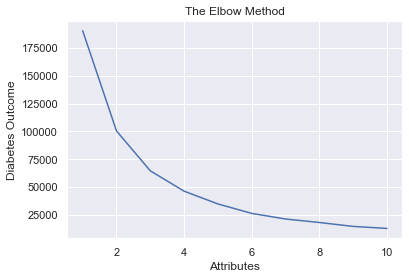

<Figure size 432x288 with 0 Axes>

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

dataset = pd.read_csv('proj-data.csv')
X = dataset.iloc[:, [7, 9]].values
y = dataset.iloc[:, 10].values
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Attributes')
plt.ylabel('Diabetes Outcome')
plt.show()
plt.savefig('KmeansTraining-Diabetes.png')

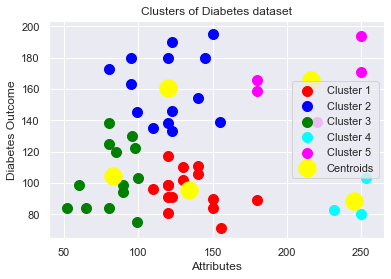

<Figure size 432x288 with 0 Axes>

In [42]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Diabetes dataset')
plt.xlabel('Attributes')
plt.ylabel('Diabetes Outcome')
plt.legend()
plt.show()
plt.savefig('Kmeans-Visual-Diabetes.png')

In [43]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.42


FOR KIDNEY

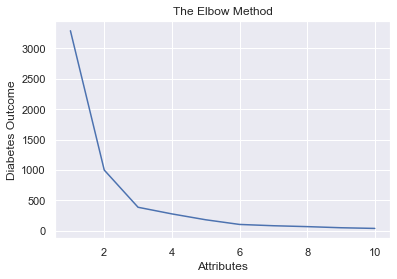

<Figure size 432x288 with 0 Axes>

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

dataset = pd.read_csv('proj-data.csv')
X = dataset.iloc[:, [11, 13]].values
y = dataset.iloc[:, 14].values

"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Attributes')
plt.ylabel('Diabetes Outcome')
plt.show()
plt.savefig('KmeansTraining-Kidney.png')

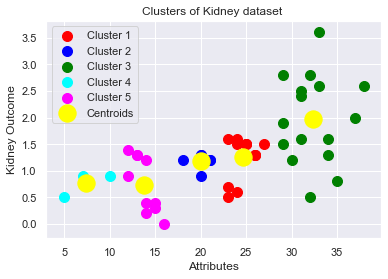

<Figure size 432x288 with 0 Axes>

In [45]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Kidney dataset ')
plt.xlabel('Attributes')
plt.ylabel('Kidney Outcome')
plt.legend()
plt.show()
plt.savefig('KmeansVisual-Kidney.png')


In [46]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.06
